Lab05 A1/A2: Train metrics: {'MSE': 2.2744965352534374e-27, 'RMSE': np.float64(4.7691682034223086e-14), 'MAPE_percent': np.float64(2.2226606614595165e-15), 'R2': 1.0}
Lab05 A2: Test metrics: {'MSE': 2.261042317684966e-27, 'RMSE': np.float64(4.7550418690953356e-14), 'MAPE_percent': np.float64(2.227270392339872e-15), 'R2': 1.0}
Lab05 A4-A5 k=2 clustering eval: {'silhouette': 0.32904607471353586, 'calinski_harabasz': 13617.010106333291, 'davies_bouldin': 1.1065846660473164}


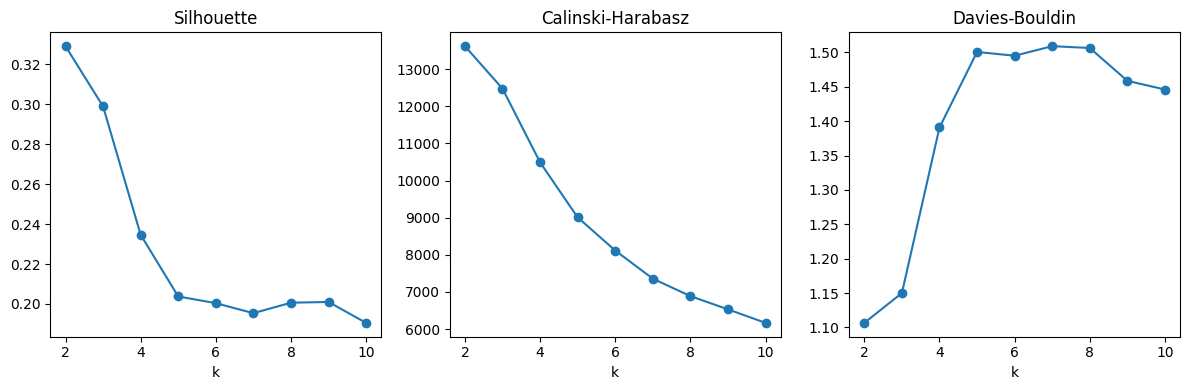

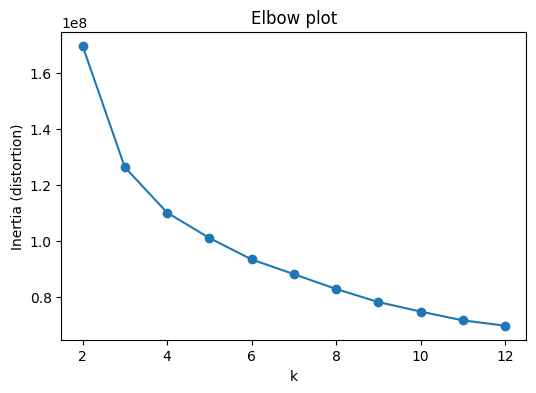

In [1]:
# Lab05_all_questions.py
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def load_data(path="/mnt/data/extracted_audio_features.csv"):
    df = pd.read_csv('/Users/dhrithijuvva/Desktop/Women_ML/extracted_audio_features.csv')
    feature_cols = [c for c in df.columns if c.startswith("MFCC")]
    return df, feature_cols

# ---------- A1/A2: Linear regression using one attribute ----------
def train_linear_regression_single_feature(df, feature_col="MFCC1", test_size=0.3, random_state=42):
    X = df[[feature_col]].values
    # Use another numeric column as target? Here use MFCC2 as target for demonstration if exists.
    # As instruction says: if project is classification, consider numeric attribute as target values.
    y = df[feature_col].values  # trivial self-prediction; but still computes metrics (demonstrative)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    return {"model": reg, "X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test,
            "y_train_pred": y_train_pred, "y_test_pred": y_test_pred}

def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    # MAPE: guard zeros
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = np.where(y_true==0, np.nan, y_true)
    mape = np.nanmean(np.abs((y_true - y_pred) / denom)) * 100.0
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAPE_percent": mape, "R2": r2}

# ---------- A4-A7: k-means clustering ----------
def perform_kmeans(X_train, n_clusters=2, random_state=42):
    km = KMeans(n_clusters=n_clusters, random_state=random_state, n_init="auto")
    km.fit(X_train)
    return km

def evaluate_clustering(X, labels):
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    return {"silhouette": sil, "calinski_harabasz": ch, "davies_bouldin": db}

def elbow_plot(X_train, k_min=2, k_max=15):
    distortions = []
    ks = list(range(k_min, k_max+1))
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(6,4))
    plt.plot(ks, distortions, marker='o')
    plt.xlabel("k")
    plt.ylabel("Inertia (distortion)")
    plt.title("Elbow plot")
    plt.show()
    return {"ks": ks, "distortions": distortions}

# ---------- Main ----------
if __name__ == "__main__":
    df, feature_cols = load_data()
    # A1: linear regression on MFCC1 (demo)
    res = train_linear_regression_single_feature(df, feature_col="MFCC1")
    train_metrics = regression_metrics(res["y_train"], res["y_train_pred"])
    test_metrics = regression_metrics(res["y_test"], res["y_test_pred"])
    print("Lab05 A1/A2: Train metrics:", train_metrics)
    print("Lab05 A2: Test metrics:", test_metrics)

    # A4: k-means clustering on all MFCC features (drop Label)
    X = df[feature_cols].values
    # choose split (we can use all data)
    km2 = perform_kmeans(X, n_clusters=2)
    labels_k2 = km2.labels_
    eval_k2 = evaluate_clustering(X, labels_k2)
    print("Lab05 A4-A5 k=2 clustering eval:", eval_k2)

    # A6: clustering for different k and evaluate metrics
    results = {}
    ks = list(range(2, 11))
    sils = []
    chs = []
    dbs = []
    for k in ks:
        km = perform_kmeans(X, n_clusters=k)
        ev = evaluate_clustering(X, km.labels_)
        sils.append(ev["silhouette"])
        chs.append(ev["calinski_harabasz"])
        dbs.append(ev["davies_bouldin"])
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1); plt.plot(ks, sils, marker='o'); plt.title("Silhouette"); plt.xlabel("k")
    plt.subplot(1,3,2); plt.plot(ks, chs, marker='o'); plt.title("Calinski-Harabasz"); plt.xlabel("k")
    plt.subplot(1,3,3); plt.plot(ks, dbs, marker='o'); plt.title("Davies-Bouldin"); plt.xlabel("k")
    plt.tight_layout()
    plt.show()

    # A7: elbow plot
    elbow_plot(X, 2, 12)
